In [166]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Basic RNNs
## Generate the Dataset

In [87]:
# pay attention to the shape of each variable!!!
def generate_time_series(batch_size, n_steps):
    # batch_size -> column nums; n_steps -> window size
    
    # each batch(each column) has different freq & offset
    # e.g. batch = 20, 20 different waves with different offset and freq but same time step 
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    
    # set time step (window size, the time duration of sine wave)
    time = np.linspace(0, 1, n_steps)
    # e.g. time(50steps list) - offset(100batch column) = 50(steps) * 100(each column)
    # output : time steps r columns, batch r rows
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10)) # wave1
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20)) # + wave2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # noise
    
    return series[..., np.newaxis].astype(np.float32)

### practice 

In [124]:
# practice
# set fixed random seed
np.random.seed(42)

# mean time duration or window size
n_steps = 50
# means how many dataset 
batch = 100
# partition the time duration for train, valid and test data
split_1 = .7
split_index_1 = int(split_1 * batch)
split_2 = .9
split_index_2 = int(split_2 * batch)

# generate a series with shape(batch_size -> rows, time_steps -> columns)
series = generate_time_series(batch, n_steps + 1)
X_train, y_train = series[:split_index_1, :n_steps], series[:split_index_1, -1]
X_valid, y_valid = series[split_index_1:split_index_2, :n_steps], series[split_index_1:split_index_2, -1]
X_test, y_test = series[split_index_2:, :n_steps], series[split_index_2:, -1]


### e.g.show plot 

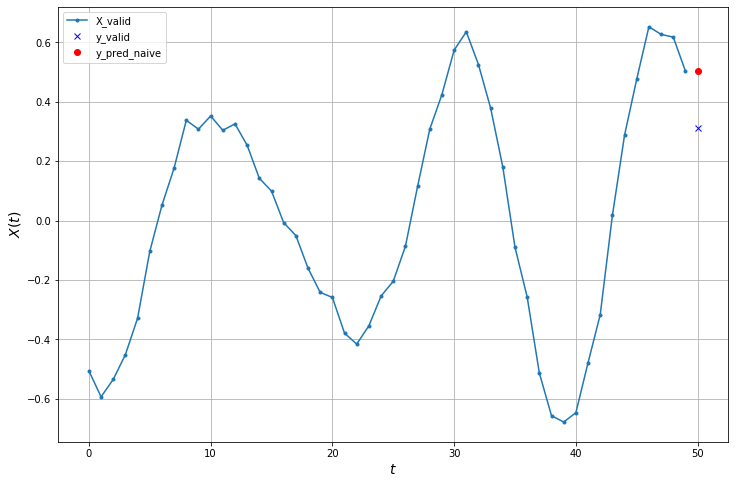

In [242]:
# show plot 
# set batch number to show
batch_num = 5

# set fig parameters
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
# plot X_valid
ax.plot(X_valid[batch_num, :, 0], ".-", label="X_valid")
# plot y_valid in blue "x"
ax.plot(n_steps, y_valid[batch_num, 0], "bx", label="y_valid")
# plot pred y for n_step + 1 in red "o"
# y_pred is naive forecast(the value of y(t-1), the n_steps-1 value)
y_pred = X_valid[batch_num, -1, 0]
ax.plot(n_steps, y_pred, "ro", label="y_pred_naive")

plt.xlabel("$t$", fontsize=14) # $$ -> tilt words
plt.ylabel("$X(t)$", fontsize=14) 
plt.legend()
plt.grid()
plt.show()

## Decide Baselines
(By Naive Forecast : just predict the last observed value)


In [167]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.021048468

In [ ]:
y_pred

### Linear predictions

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=200,
                   validation_data=(X_valid, y_valid))

1/1 [==============================] - 0s 16ms/step - loss: 0.0295
avg_loss_evaluation : 0.02951807901263237


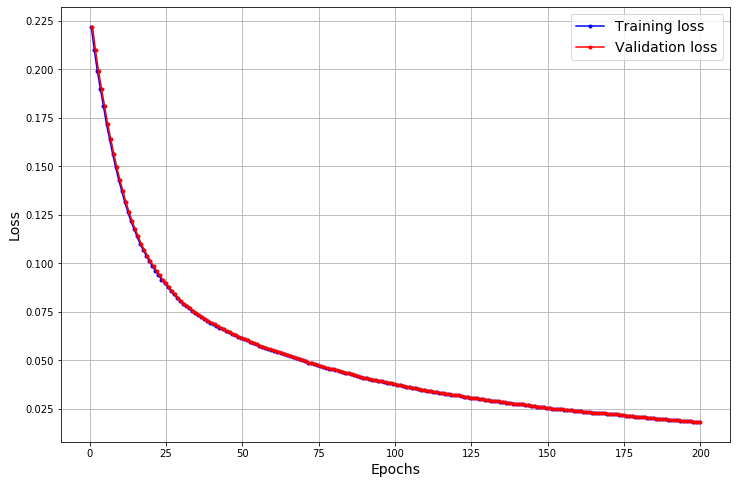

In [204]:
# model evaluation
print("avg_loss_evaluation : {}".format(model.evaluate(X_valid, y_valid)))

loss = history.history["loss"]
val_loss = history.history["val_loss"]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
ax.plot(np.arange(len(val_loss))+0.9 , loss, "r.-", label="Validation loss")

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

plt.legend(fontsize=14)
plt.grid()
plt.show()

### Compare with baseline

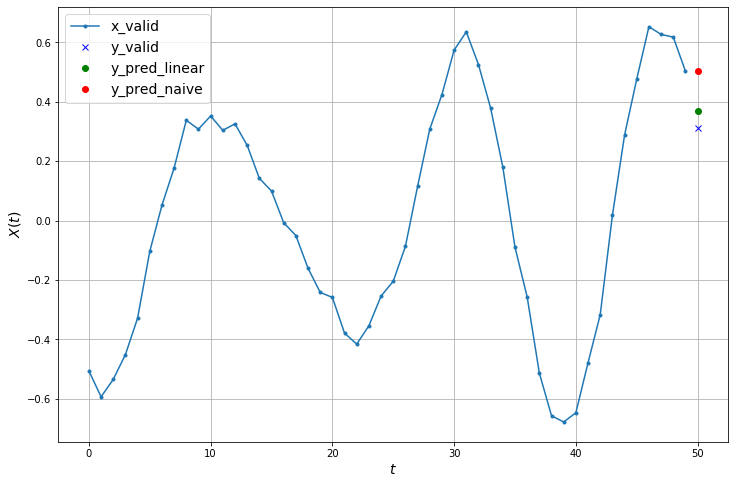

In [225]:
y_pred_linear = model.predict(X_valid)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(X_valid[batch_num, :, 0], ".-", label="x_valid")
ax.plot(n_steps ,y_valid[batch_num, 0], "bx", label="y_valid")
ax.plot(n_steps ,y_pred_linear[batch_num, 0], "go", label="y_pred_linear")
ax.plot(n_steps ,y_pred[batch_num, 0], "ro", label="y_pred_naive")

ax.legend(fontsize=14)
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$X(t)$", fontsize=14)
plt.grid()
plt.show()

## Simple RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                   validation_data=(X_valid, y_valid))


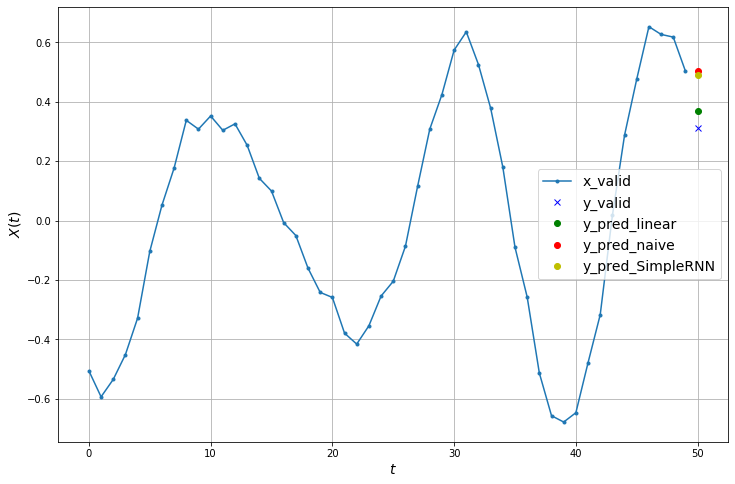

In [231]:
y_pred_SimpleRNN = model.predict(X_valid)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(X_valid[batch_num, :, 0], ".-", label="x_valid")
ax.plot(n_steps ,y_valid[batch_num, 0], "bx", label="y_valid")
ax.plot(n_steps ,y_pred_linear[batch_num, 0], "go", label="y_pred_linear")
ax.plot(n_steps ,y_pred[batch_num, 0], "ro", label="y_pred_naive")
ax.plot(n_steps ,y_pred_SimpleRNN[batch_num, 0], "yo", label="y_pred_SimpleRNN")

ax.legend(fontsize=14)
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$X(t)$", fontsize=14)
plt.grid()
plt.show()

## Deep RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model =keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])
model.compile(loss="mse", optimizer="Adam")
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))

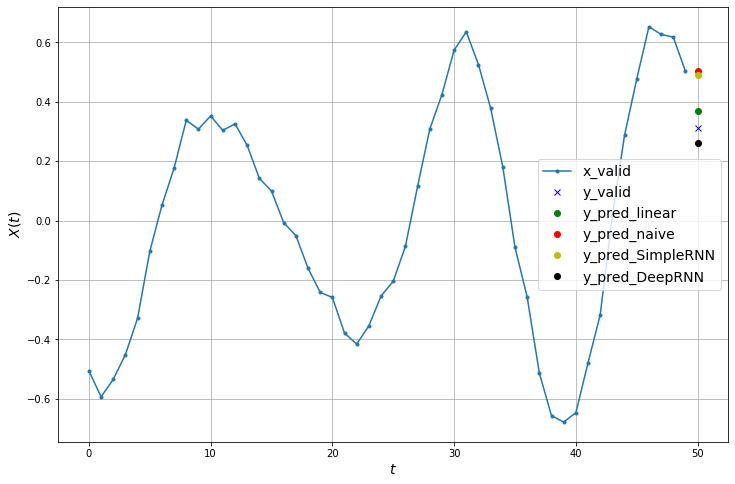

In [235]:
y_pred_DeepRNN = model.predict(X_valid)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(X_valid[batch_num, :, 0], ".-", label="x_valid")
ax.plot(n_steps ,y_valid[batch_num, 0], "bx", label="y_valid")
ax.plot(n_steps ,y_pred_linear[batch_num, 0], "go", label="y_pred_linear")
ax.plot(n_steps ,y_pred[batch_num, 0], "ro", label="y_pred_naive")
ax.plot(n_steps ,y_pred_SimpleRNN[batch_num, 0], "yo", label="y_pred_SimpleRNN")
ax.plot(n_steps ,y_pred_DeepRNN[batch_num, 0], "ko", label="y_pred_DeepRNN")

ax.legend(fontsize=14)
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$X(t)$", fontsize=14)
plt.grid()
plt.show()